In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import random

dataset = pd.read_csv('churn_data.csv')

In [2]:
# 1. 데이터 살펴보기

dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
dataset.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [4]:
# 2-1. 결측치 확인

dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [6]:
# 2-2. 결측치 제거

dataset = dataset[pd.notnull(dataset['age'])]
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

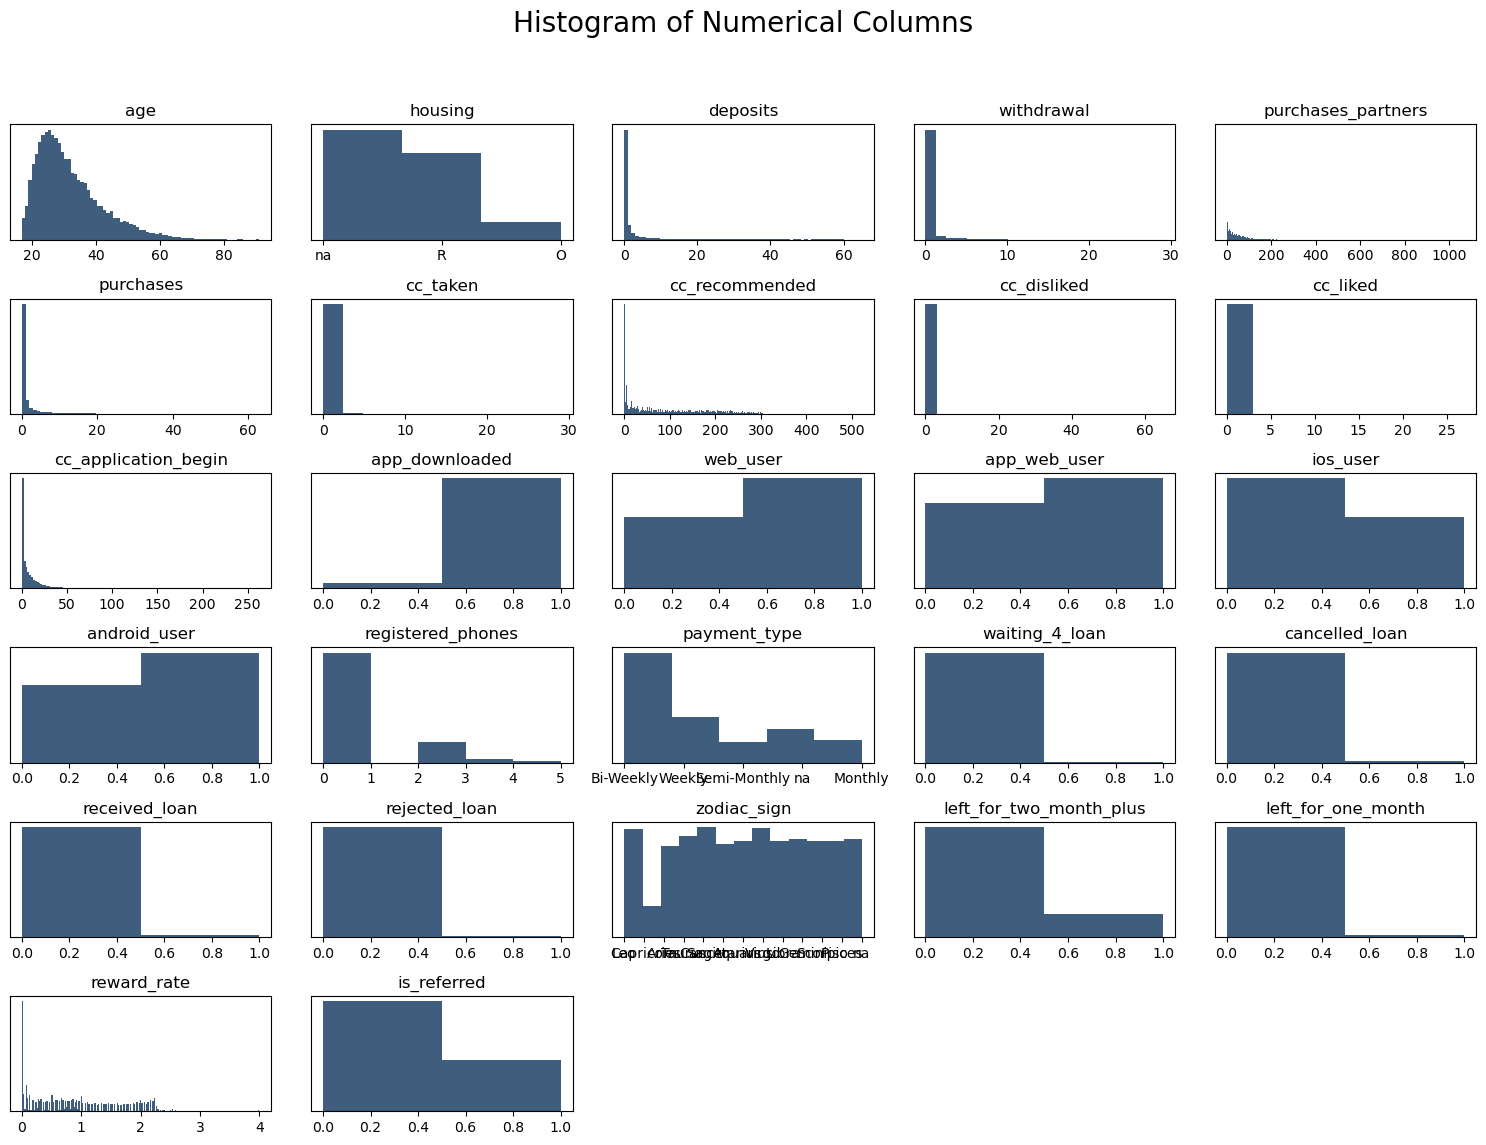

In [7]:
# 3-1. 데이터 시각화(히스토그램)

dataset2 = dataset.drop(columns = ['user', 'churn']) # 유저식별자, 반응변수인 churn 제거 후 시각화

fig = plt.figure(figsize=(15,12))
plt.suptitle('Histogram of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color = '#3F5D7D')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

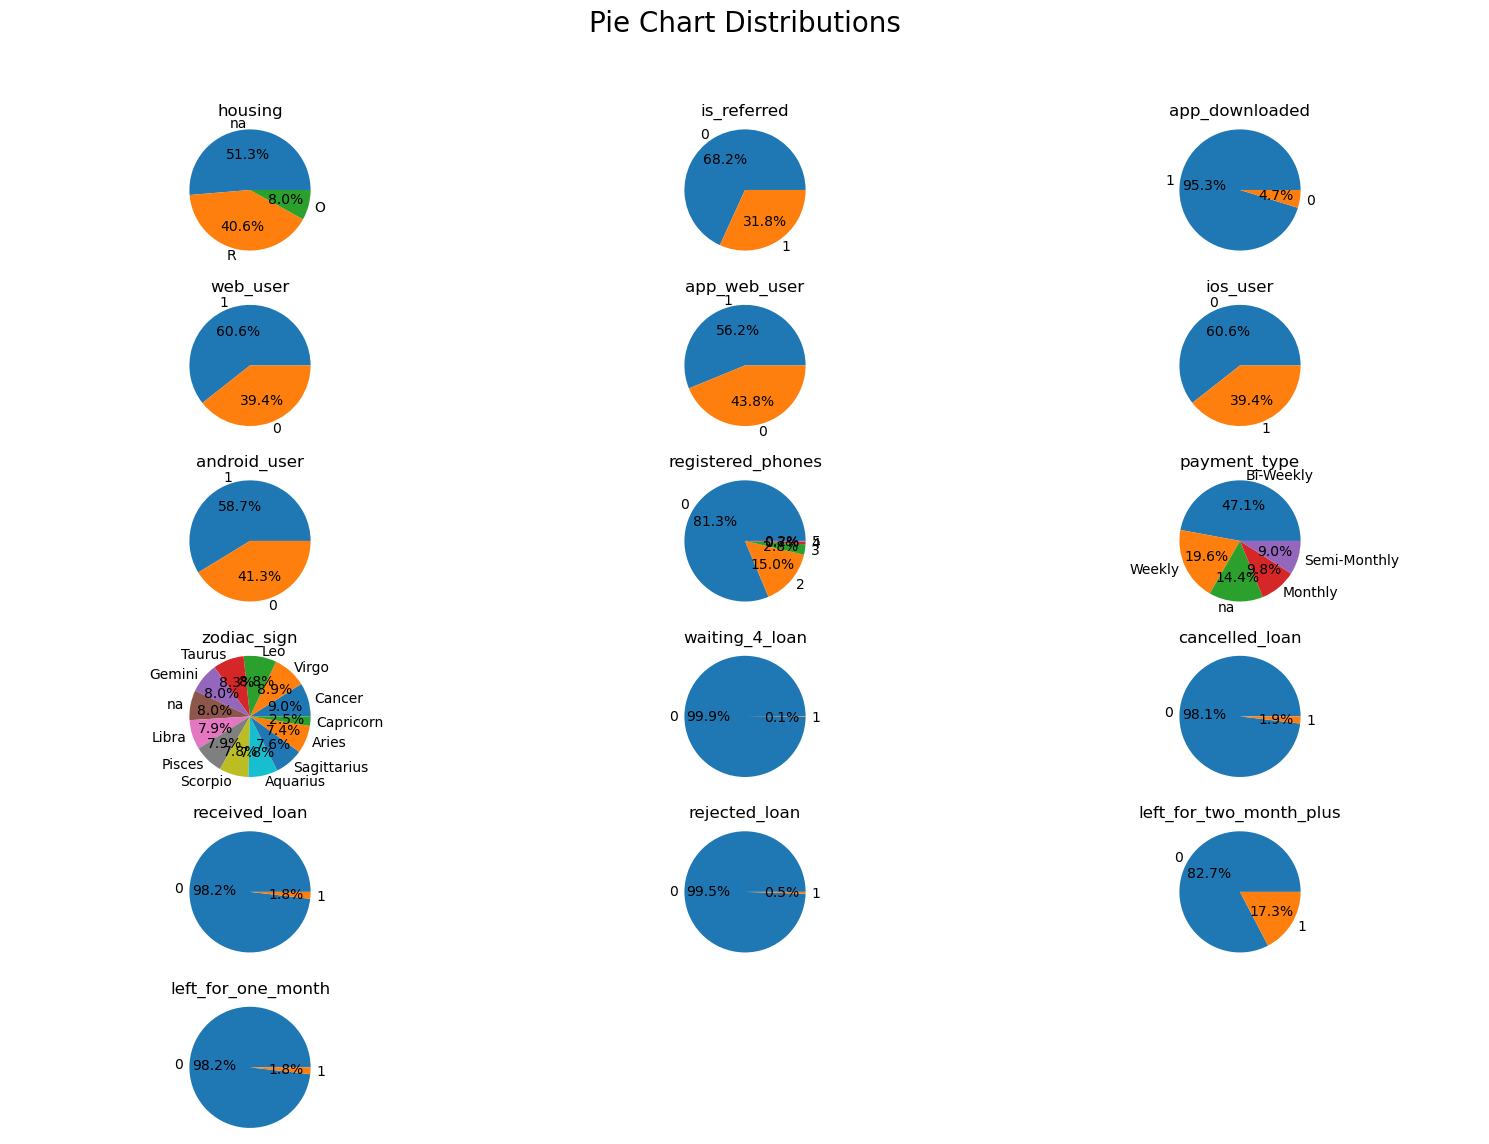

In [8]:
# 3-2. 데이터 시각화(파이그래프)

dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                   'web_user', 'app_web_user', 'ios_user',
                   'android_user' ,'registered_phones', 'payment_type',
                   'zodiac_sign', 'waiting_4_loan', 'cancelled_loan',
                   'received_loan', 'rejected_loan',
                   'left_for_two_month_plus', 'left_for_one_month']]

fig = plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [9]:
# 해지응답률 변수를 포함한 값 분포도 확인
waiting_4_loan_churn_counts = dataset[dataset2.waiting_4_loan == 1].churn.value_counts()
cancelled_loan_churn_counts = dataset[dataset2.cancelled_loan == 1].churn.value_counts()
received_loan_churn_counts = dataset[dataset2.received_loan == 1].churn.value_counts()
rejected_loan_churn_counts = dataset[dataset2.rejected_loan == 1].churn.value_counts()
left_for_one_month_churn_counts = dataset[dataset2.left_for_one_month == 1].churn.value_counts()

# 결과 출력
print("Churn counts for waiting_4_loan:")
print(waiting_4_loan_churn_counts)

print("\nChurn counts for cancelled_loan:")
print(cancelled_loan_churn_counts)

print("\nChurn counts for received_loan:")
print(received_loan_churn_counts)

print("\nChurn counts for rejected_loan:")
print(rejected_loan_churn_counts)

print("\nChurn counts for left_for_one_month:")
print(left_for_one_month_churn_counts)

Churn counts for waiting_4_loan:
0    27
1     8
Name: churn, dtype: int64

Churn counts for cancelled_loan:
1    274
0    234
Name: churn, dtype: int64

Churn counts for received_loan:
1    292
0    199
Name: churn, dtype: int64

Churn counts for rejected_loan:
1    107
0     25
Name: churn, dtype: int64

Churn counts for left_for_one_month:
1    266
0    222
Name: churn, dtype: int64


<Axes: title={'center': 'Correlation with the Response Variable'}>

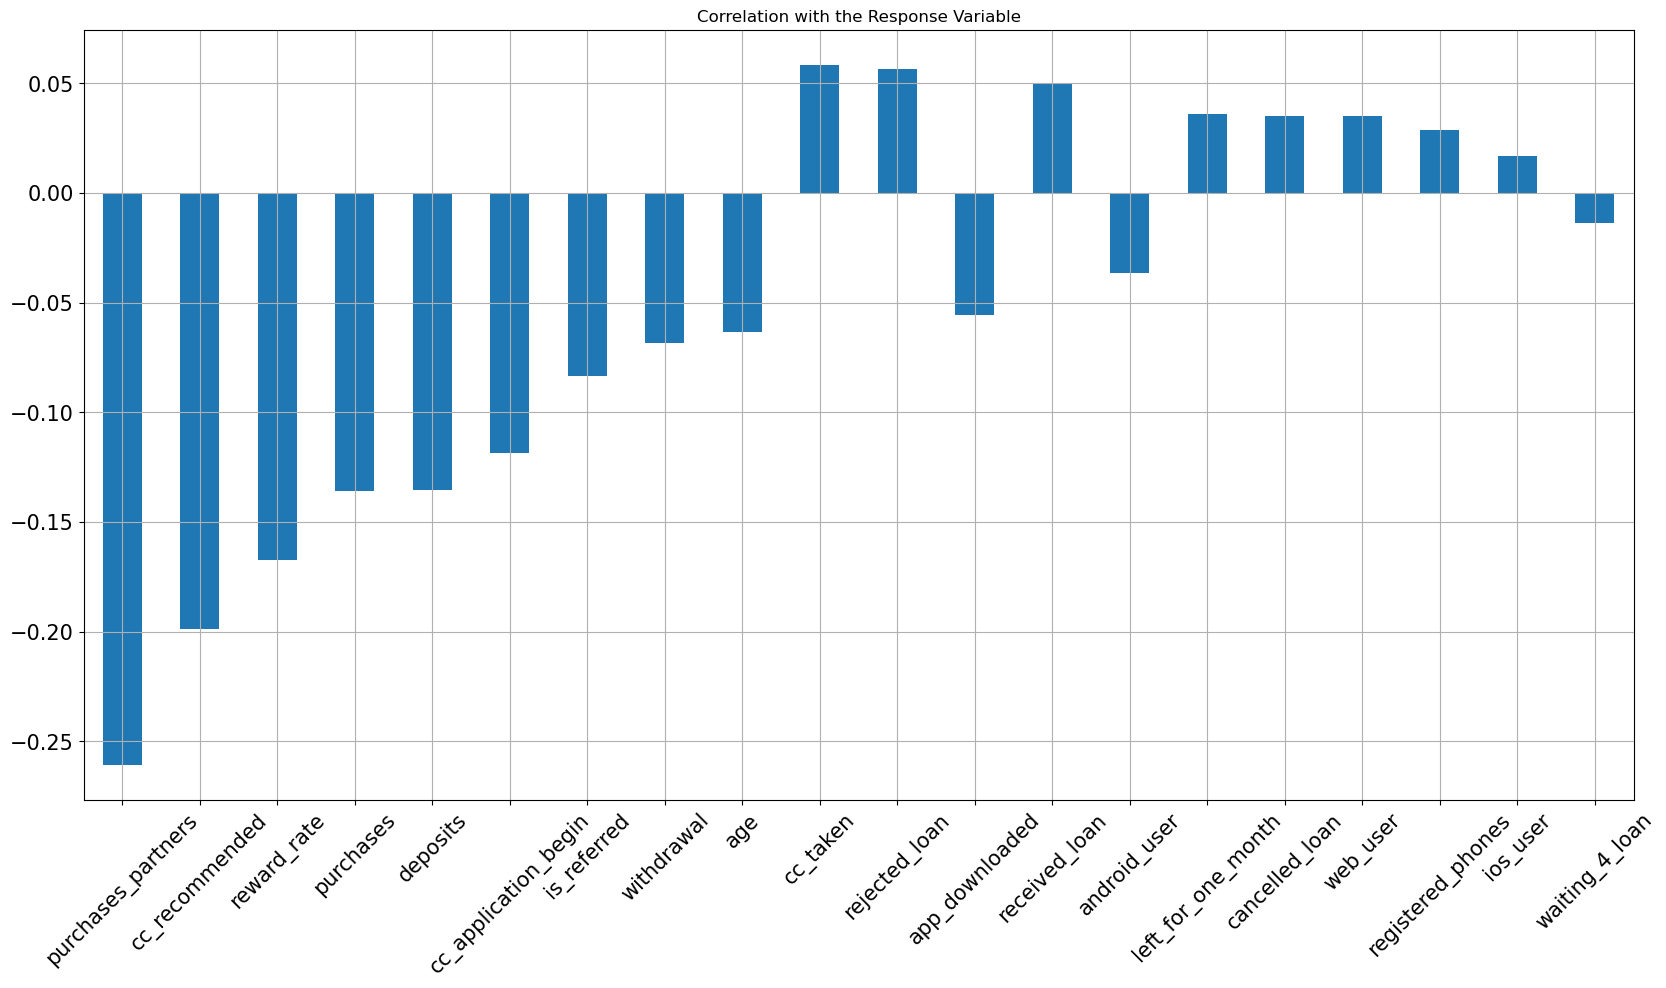

In [10]:
# 4-1. 상관관계'churn'과의 상관관계 계산
correlation = dataset.drop(columns=['churn', 'user', 'housing', 'payment_type', 'zodiac_sign']).corrwith(dataset['churn'])

# 상위 20개 필드 선택
top_correlated_fields = correlation.abs().sort_values(ascending=False).head(20).index
dataset_filtered = dataset[top_correlated_fields]

# 남은 필드들과 'churn'간의 상관관계 시각화
dataset_filtered.corrwith(dataset['churn']).plot.bar(
    figsize=(20, 10), title='Correlation with the Response Variable', fontsize=15,
    rot=45, grid=True)

C:\Users\hyoun\AppData\Local\Temp\ipykernel_8496\1200482134.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.drop(columns=['user', 'churn']).corr()


<Axes: >

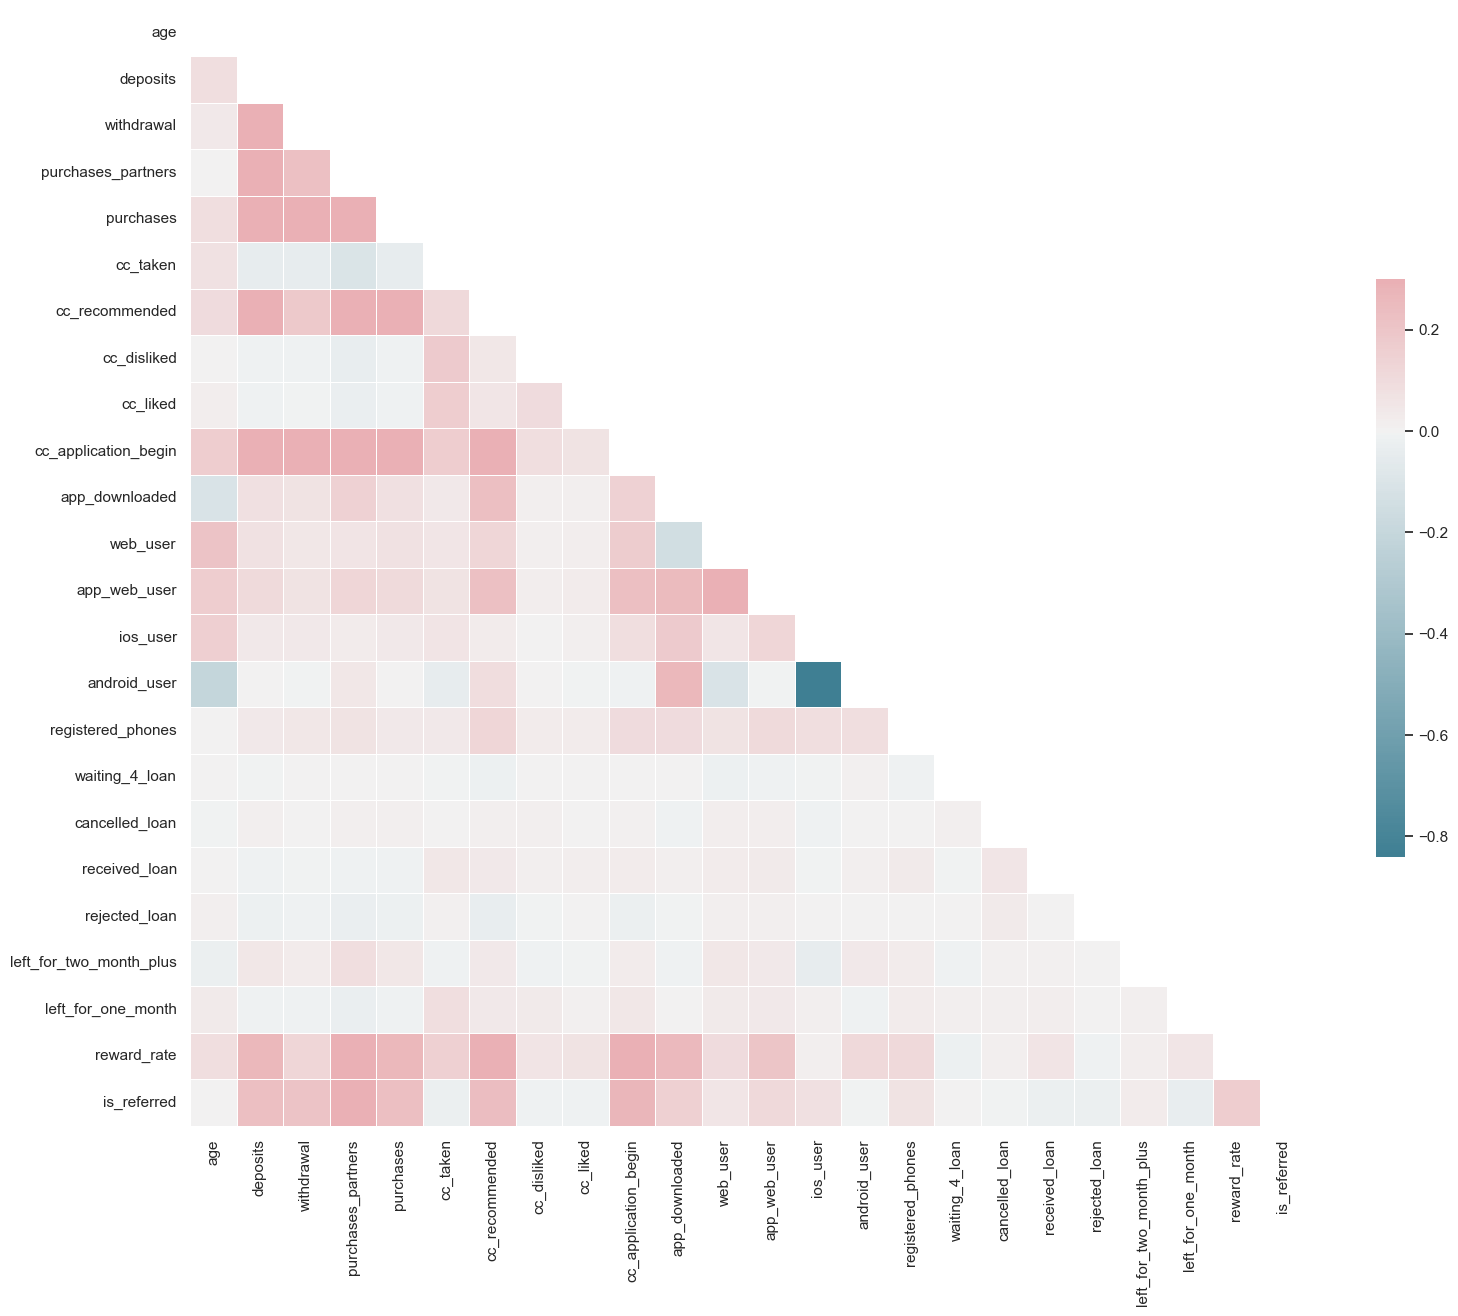

In [11]:
# 4-2. 상관관계 히트맵
sn.set(style='white')
corr = dataset.drop(columns=['user', 'churn']).corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

cmap = sn.diverging_palette(220, 10, as_cmap=True)

sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
          square=True, linewidths=.5, cbar_kws={'shrink': .5})

In [12]:
# 5. 데이터 전처리

dataset = dataset.drop(columns=['app_web_user'])
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

In [13]:
# 5-1. One-Hot Encoding (범주형 데이터 변환)
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [14]:
# 상관관계의 열을 제거 (null과 다름 없는 필드 제거)
dataset = dataset.drop(columns=['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [15]:
# 6. train, test set 생성

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns='churn'),
                                                   dataset['churn'],
                                                   test_size=0.2,
                                                   random_state=0)

In [16]:
# 7. 학습 세트 밸런싱, 특성 스케일링

y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [17]:
# 7-1. 학습 세트 밸런싱 (언더샘플링)

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [18]:
# 7-2. 특성 스케일링
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

In [19]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,-0.620118,-0.355851,-0.288411,-0.589195,-0.355448,-0.167697,-0.911912,-0.057040,-0.077676,-0.570359,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,-0.299631,-0.311556
19770,-0.419137,-0.355851,-0.288411,-0.637770,-0.355448,-0.167697,0.314334,1.026776,-0.077676,-0.570359,...,-0.317141,-0.155474,-0.302283,-0.31188,3.416411,-0.295846,-0.28954,-0.29022,-0.299631,-0.311556
8356,0.284295,-0.355851,-0.288411,-0.637770,-0.355448,-0.167697,1.994747,-0.057040,-0.077676,-0.246422,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,-0.299631,3.209696
17887,0.585766,-0.355851,-0.288411,0.042273,-0.355448,-0.167697,-0.185248,-0.057040,-0.077676,-0.003469,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,3.337438,-0.311556
25153,-0.821098,-0.242736,-0.288411,-0.103450,-0.240166,-0.167697,-0.582642,-0.057040,-0.077676,-0.246422,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,3.380132,-0.28954,-0.29022,-0.299631,-0.311556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,0.284295,-0.355851,-0.288411,-0.564908,-0.355448,-0.167697,-0.968683,-0.057040,-0.077676,-0.570359,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,-0.299631,-0.311556
24350,1.892141,1.453991,1.617978,-0.176312,1.489073,-0.167697,-0.094415,-0.057040,-0.077676,2.830979,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,-0.299631,-0.311556
21699,0.083315,-0.355851,-0.288411,-0.637770,-0.355448,1.964896,0.473292,-0.057040,-0.077676,0.077515,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,-0.299631,3.209696
6236,1.188709,-0.129621,-0.288411,1.790955,-0.124883,-0.167697,1.540581,-0.057040,-0.077676,0.077515,...,-0.317141,-0.155474,-0.302283,-0.31188,-0.292705,-0.295846,-0.28954,-0.29022,-0.299631,-0.311556


Model: LogisticRegression
Confusion Matrix:
 [[1651 1515]
 [ 586 1648]]
정확도: 0.6109
정밀도: 0.5210
재현율: 0.7377
F1 스코어: 0.6107


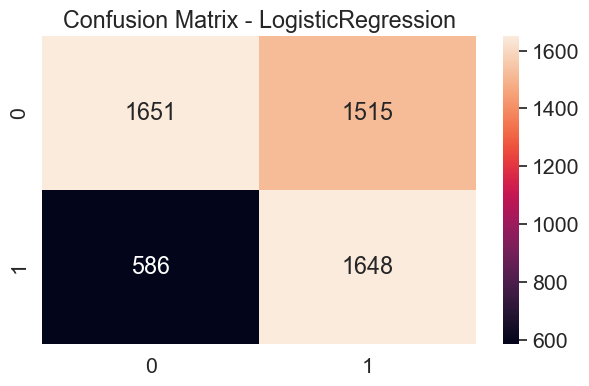

Model: RandomForestClassifier
Confusion Matrix:
 [[2014 1152]
 [ 572 1662]]
정확도: 0.6807
정밀도: 0.5906
재현율: 0.7440
F1 스코어: 0.6585


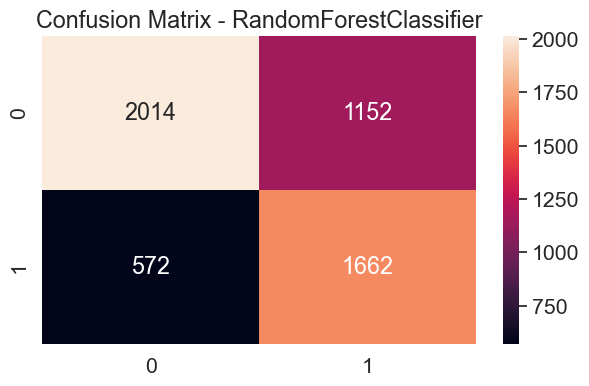

Model: GradientBoostingClassifier
Confusion Matrix:
 [[2060 1106]
 [ 654 1580]]
정확도: 0.6741
정밀도: 0.5882
재현율: 0.7073
F1 스코어: 0.6423


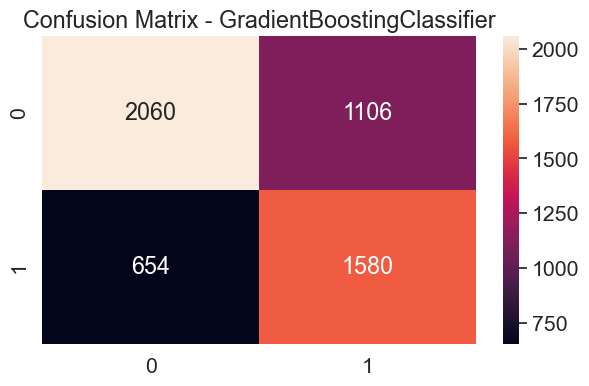

Model: XGBClassifier
Confusion Matrix:
 [[2063 1103]
 [ 643 1591]]
정확도: 0.6767
정밀도: 0.5906
재현율: 0.7122
F1 스코어: 0.6457


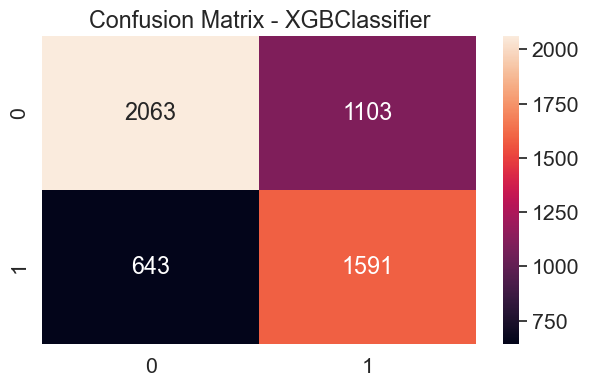

In [20]:
# 8. 모델 학습

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# 모델 리스트 생성
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    XGBClassifier(random_state=0)
]

# 9. 모델 학습 및 평가
for model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 결과 출력
    print(f"Model: {type(model).__name__}")
    print("Confusion Matrix:\n", cm)
    print("정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1 스코어: {:.4f}".format(f1))
    print("="*50)
    
    # 시각화 (Confusion Matrix)
    df_cm = pd.DataFrame(cm, index=(0,1), columns=(0,1))
    plt.figure(figsize=(7,4))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True, fmt='g')
    plt.title(f"Confusion Matrix - {type(model).__name__}")
    plt.show()

In [21]:
# 10. K겹 교차검증

from sklearn.model_selection import cross_val_score

for model in models:
    accuracies = cross_val_score(estimator=model,
                                 X=X_train,
                                 y=y_train,
                                 cv=10)
    
    # 교차검증 정확도 출력
    print(f"Model: {type(model).__name__}")
    print("Mean Accuracy:", accuracies.mean())
    print("="*50)

Model: LogisticRegression
Mean Accuracy: 0.6453020134228189
Model: RandomForestClassifier
Mean Accuracy: 0.78165548098434
Model: GradientBoostingClassifier
Mean Accuracy: 0.6960290827740492
Model: XGBClassifier
Mean Accuracy: 0.7365771812080537


In [22]:
# 11. 특성 선택하여 모델 학습 & 평가 (RFE 모델 사용)

from sklearn.feature_selection import RFE

def evaluate_model(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\nModel: {model_name}")
    print(f"Confusion Matrix:\n{cm}")
    print("정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1 스코어: {:.4f}".format(f1))

    
# Logistic Regression 모델 생성
logistic_classifier = LogisticRegression()
rfe = RFE(logistic_classifier, n_features_to_select=20)
rfe.fit(X_train, y_train)
print(X_train.columns[rfe.support_])

# 선택된 특성만 사용하여 데이터 준비
selected_features_rfe = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

# 모델 학습
logistic_classifier.fit(X_train_rfe, y_train)

random_forest_classifier = RandomForestClassifier(random_state=0)
random_forest_classifier.fit(X_train_rfe, y_train)

gradient_boosting_classifier = GradientBoostingClassifier(random_state=0)
gradient_boosting_classifier.fit(X_train_rfe, y_train)

xgb_classifier = XGBClassifier(random_state=0)
xgb_classifier.fit(X_train_rfe, y_train)

y_pred_logistic = logistic_classifier.predict(X_test_rfe)
evaluate_model("Logistic Regression", y_test, y_pred_logistic)

y_pred_rf = random_forest_classifier.predict(X_test_rfe)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)

y_pred_gb = gradient_boosting_classifier.predict(X_test_rfe)
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

y_pred_xgb = xgb_classifier.predict(X_test_rfe)
evaluate_model("XGBoost", y_test, y_pred_xgb)

Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'web_user', 'ios_user', 'registered_phones',
       'waiting_4_loan', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'payment_type_Weekly', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini'],
      dtype='object')

Model: Logistic Regression
Confusion Matrix:
[[1652 1514]
 [ 588 1646]]
정확도: 0.6107
정밀도: 0.5209
재현율: 0.7368
F1 스코어: 0.6103

Model: Random Forest Classifier
Confusion Matrix:
[[2022 1144]
 [ 586 1648]]
정확도: 0.6796
정밀도: 0.5903
재현율: 0.7377
F1 스코어: 0.6558

Model: Gradient Boosting
Confusion Matrix:
[[2036 1130]
 [ 644 1590]]
정확도: 0.6715
정밀도: 0.5846
재현율: 0.7117
F1 스코어: 0.6419

Model: XGBoost
Confusion Matrix:
[[2086 1080]
 [ 628 1606]]
정확도: 0.6837
정밀도: 0.5979
재현율: 0.7189
F1 스코어: 0.6528
